# 1. Joint distribution of two random variables

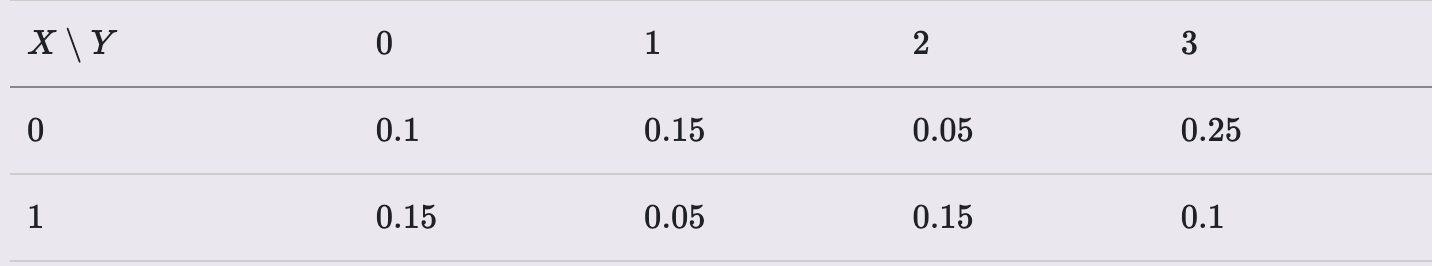
Calculate E(X) and E(Y) and assign the results to mx and my, respectively.

In [11]:
import numpy as np
import pandas as pd
pxy = np.array([[0.1, 0.15, 0.05, 0.25],
                [0.15, 0.05, 0.15, 0.1]])
pxy

array([[0.1 , 0.15, 0.05, 0.25],
       [0.15, 0.05, 0.15, 0.1 ]])

In [20]:
# sum of x
px = np.sum(pxy, axis=1)
px

array([0.55, 0.45])

In [21]:
# sum of y
py = np.sum(pxy, axis=0)
py

array([0.25, 0.2 , 0.2 , 0.35])

In [22]:
# y axis
y = np.arange(4)
y

array([0, 1, 2, 3])

In [23]:
# x axis
x = np.array([0,1])
x

array([0, 1])

In [24]:
# expected value of y and x
my = (py*y).sum()
mx = (px*x).sum()

print(mx, my)

0.44999999999999996 1.65


In [26]:
# Matrix multiplied by y values to get (seperated) expected value
Qy = pxy.dot(y)
Qy

array([1.  , 0.65])

In [27]:
# y expected value multiplied by x to get E(xy) the joint expected value of x and y
Qx = x.dot(Qy)
Qx

np.float64(0.65)

# Task 1.2
Find cov (X, Y) = E(XY) - E(X)E(Y) and assign it to covxy.

In [28]:
covxy = Qx -  my*mx
covxy

np.float64(-0.09249999999999992)

# Task 1.3
Find sigma (X) and sigma (Y) using the formulas

3(X)= Var(X)= E(X^2) - (E(X))^2

and assign them to sx, sy, respectively. Recall that the square root can be obtained by using np. sqrt function.

In [51]:
sx = np.sqrt((px*(x**2)).sum() - mx**2)
sy = np.sqrt((py*(y**2)).sum() - my**2)

print([sx,sy])

[np.float64(0.49749371855331), np.float64(1.1947803145348523)]


# Task 1.4
Find corr (X, Y) = and assign it to corrxy.

In [53]:
corrxy = covxy/(sx*sy)
corrxy

np.float64(-0.15562023709382963)

In [58]:
df = pd.read_csv('jointdistr.csv', engine='pyarrow', dtype_backend='pyarrow')

In [61]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.003,0.005,0.001,0.002,0.004,0.001,0.005,0.004,0.004,0.004,0.003,0.006,0.001,0.004,0.006,0.001,0.006,0.003,0.005
1,0.001,0.006,0.002,0.006,0.001,0.006,0.006,0.002,0.002,0.002,0.003,0.003,0.006,0.006,0.001,0.006,0.002,0.001,0.001
2,0.001,0.001,0.006,0.004,0.004,0.001,0.004,0.006,0.005,0.006,0.006,0.004,0.001,0.004,0.003,0.006,0.001,0.001,0.005
3,0.005,0.005,0.002,0.004,0.006,0.006,0.006,0.004,0.001,0.005,0.006,0.006,0.001,0.006,0.003,0.006,0.006,0.001,0.001
4,0.001,0.006,0.006,0.002,0.001,0.001,0.004,0.001,0.002,0.002,0.001,0.001,0.002,0.005,0.005,0.001,0.003,0.006,0.001


In [66]:
df.shape

(15, 19)

In [69]:
pxy = df.to_numpy()

# Task 1.6
Let X € {0,..., 14} and Y € {0,..., 18} be discrete random variables with the joint distribution given by the table above. Find corr (X, Y).

In [103]:
y = np.arange(0,15)
x = np.arange(0,19)

py = y.dot(pxy).sum()
px = pxy.dot(x).sum()
print('expected value of x and y: ', px,py)

exy = (y.dot(pxy)).dot(x)
print('expected value of joint x and y: ', exy)

covxy = exy - py*px
print('covxy: ', covxy)

sx = np.sqrt((pxy.dot(x**2)).sum() - px**2)
sy = np.sqrt(((y**2).dot(pxy)).sum() - py**2)
print('sigma x and sigma y: ', sx, sy)

corrxy = covxy / (sx*sy)
print('Pearson\'s correlation: ', corrxy)

expected value of x and y:  8.918 7.0420000000000025
expected value of joint x and y:  62.46100000000001
covxy:  -0.33955600000000175
sigma x and sigma y:  5.412326302062727 4.358696594166652
Pearson's correlation:  -0.014393645358846512


# 2. Law of Large Numbers (LLN) and Central Limit Theorem (CLT)

In [104]:
from scipy.stats import binom
n = 5
x = binom.rvs(10, 0.3, size = n, random_state = 12)
x

array([2, 4, 2, 3, 0])

# Task 2.1

Repeat the previous calculations for n = 50, use the same random_state = 12. Assign Xn to xbar

In [111]:
xbar = binom.rvs(10, 0.3, size = 50, random_state = 12)
xbar.mean()

np.float64(3.06)

Surely, if you change random_state, you will get another sample and another value of n, that may
be more or less closer to E(X). Let now generate many such samples (of the same size n = 50).
We will use a loop for this. The following code generates K = 50 samples of length n = 50 of values
of X ~ Bin(10, 0.3) and store the sample means in the list Xbar (we use the loop index as the random state, it's not compulsory, of course):

In [118]:
n = 50
K = 50
Xbar = []
for i in range(K):
        x = binom.rvs(10, 0.3, size = n, random_state = i)
        Xbar.append(x.mean())

Xbar = np.array(Xbar)

In [120]:
Xbar

array([3.08, 2.88, 2.78, 2.88, 3.18, 2.94, 3.36, 3.  , 3.02, 3.26, 2.92,
       2.78, 3.06, 2.9 , 3.12, 2.6 , 2.7 , 2.94, 2.94, 2.86, 3.02, 3.14,
       2.9 , 2.94, 3.58, 3.02, 3.38, 3.26, 3.24, 3.34, 2.9 , 2.72, 3.16,
       2.9 , 3.  , 2.9 , 2.6 , 3.04, 3.18, 3.16, 3.  , 2.74, 2.76, 3.2 ,
       3.2 , 2.92, 2.76, 2.86, 2.74, 3.34])


Now, suppose we want to calculate P(Xn=50 ‹ 2.9). We may look at the proportion of the entries of

Xbar which are less than 2.9: namely, Xbar<2.9 is the list of True and False, where True = 1

and False = 0. Hence, the sum of this list gives the number of True among all K trials. Dividing by
K we get the desired proportion:


In [121]:
p = sum(Xbar < 2.9)/K
p

np.float64(0.28)

Next, we know that u = E(X) = 3 and sigma = sigma(X) = sqrt(10 • 0.3 • (1 - 0.3)) = 1.449, or:

In [122]:
binom.std(10, 0.3)

np.float64(1.449137674618944)

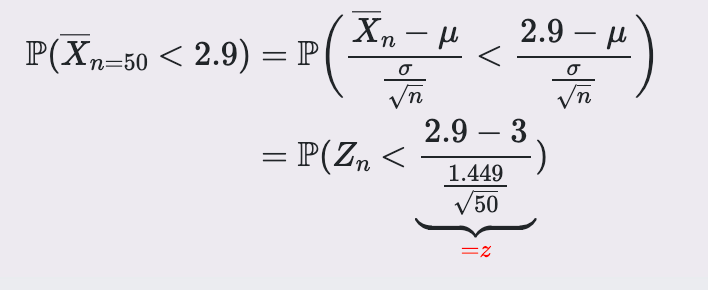

In [123]:
z = (2.9 - binom.mean(10, 0.3))/(binom.std(10, 0.3)/np.sqrt(n))
z

np.float64(-0.487950036474267)

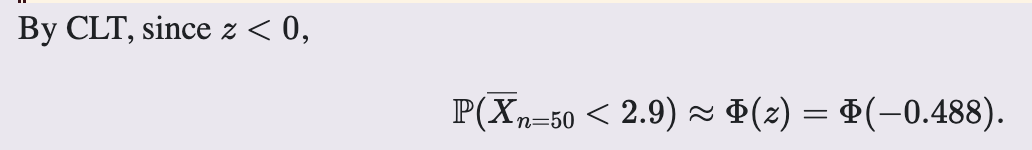

In [124]:
from scipy.stats import norm
norm.cdf(z)

np.float64(0.3127926157621625)

and we see that the value is quite close to the previously found p. Recall that p was the frequency of
the event Xn=50 < 2.9 in K = 50 trials, rather than real probability.

In [125]:
p

np.float64(0.28)

# Task 2.2
Repeat the previous considerations find p for K = 1000.

In [142]:
n = 50
k = 1000
Xbar = []

for i in range(k):
    x = binom.rvs(10, 0.3, size = n, random_state = i)
    Xbar.append(x.mean())

Xbar = np.array(Xbar)

z = ((2.9 - binom.mean(10,0.3))/(binom.std(10,0.3)/(np.sqrt(n))))
z

np.float64(-0.487950036474267)

In [135]:
norm.cdf(z)

np.float64(6.374837460548446e-06)

In [143]:
p = sum(Xbar < 2.9)/K
p

np.float64(6.12)

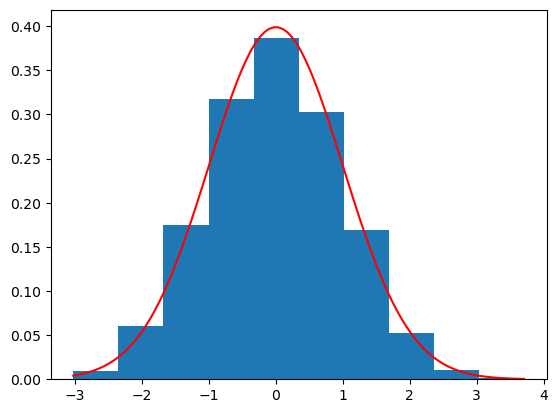

In [144]:
import matplotlib.pyplot as plt
Z = (Xbar - binom.mean(10,0.3))/(binom.std(10, 0.3)/np.sqrt(n))
plt.hist(Z, bins = 10, density = True)
x = np.linspace(min(Z), max(Z), 100)
plt.plot(x, norm.pdf(x), color = 'r')
plt.show()

In [158]:
from scipy.stats import expon
n = 50
k = 10000
Xbar = []

for i in range(k):
    x = expon.rvs(10, size = n, random_state = i)
    Xbar.append(x.mean())

Xbar = np.array(Xbar)



In [176]:
z1 = (9.5 - Xbar.mean())/(expon.std(10)/np.sqrt(n))
z2 = (10 - Xbar.mean())/(expon.std(10)/np.sqrt(n))

p = norm.cdf(z1)
q = norm.cdf(z2)

In [180]:
expon.std(10)

np.float64(1.0)

In [186]:
np.round(p - q, 5)

np.float64(-0.5)